## IMPORT STATEMENTS

In [127]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

## READING TRAIN AND TEST DATA

In [128]:
train_data = pd.read_excel('Train_dataset.xlsx', 'Train_dataset')
train_data.to_csv('csvfile1.csv1', encoding='utf-8')
test_data = pd.read_excel('Test_dataset.xlsx', 'Test_dataset')
test_data.to_csv('csvfile2.csv2', encoding='utf-8')

## CLEANING DATA

In [129]:
dropColumns = ['Designation', 'Name', 'salary','Region'] 
train_data = train_data.drop(dropColumns, axis = 1) 
test_data = test_data.drop(dropColumns, axis = 1) 
train_data = train_data.rename(columns=({'Heart rate':'Heart_rate'}))
train_data = train_data.rename(columns=({'Pulmonary score':'Pulmonary_score'}))
train_data = train_data.rename(columns=({'cardiological pressure':'cardiological_pressure'}))
train_data.Occupation=train_data.Occupation.apply(str)
train_data.Mode_transport=train_data.Mode_transport.apply(str)
train_data.comorbidity=train_data.comorbidity.apply(str)
train_data.cardiological_pressure=train_data.cardiological_pressure.apply(str)

train_data.Pulmonary_score=train_data.Pulmonary_score.apply(str)
train_data.dropna(inplace=True)
le = LabelEncoder() 
train_data['Gender']= le.fit_transform(train_data['Gender']) 
train_data['Married']= le.fit_transform(train_data['Married']) 
train_data['Occupation']= le.fit_transform(train_data['Occupation']) 
train_data['comorbidity']= le.fit_transform(train_data['comorbidity']) 

train_data['cardiological_pressure']= le.fit_transform(train_data['cardiological_pressure'])

train_data['Mode_transport']= le.fit_transform(train_data['Mode_transport']) 

train_data['Pulmonary_score']= le.fit_transform(train_data['Pulmonary_score']) 

In [130]:
columns=['Infect_Prob','people_ID']
y_train = train_data['Infect_Prob'] 
x_train = train_data.drop(columns, axis = 1) 
y_validate = validate_data['Infect_Prob'] 

x_validate = validate_data.drop(columns, axis = 1)


In [131]:
test_data = test_data.rename(columns=({'Heart rate':'Heart_rate'}))
test_data = test_data.rename(columns=({'Pulmonary score':'Pulmonary_score'}))
test_data = test_data.rename(columns=({'cardiological pressure':'cardiological_pressure'}))
test_data.Occupation=test_data.Occupation.apply(str)
test_data.Mode_transport=test_data.Mode_transport.apply(str)
test_data.comorbidity=test_data.comorbidity.apply(str)
test_data.cardiological_pressure=test_data.cardiological_pressure.apply(str)

test_data.Pulmonary_score=test_data.Pulmonary_score.apply(str)

  
test_data['Gender']= le.fit_transform(test_data['Gender']) 
test_data['Married']= le.fit_transform(test_data['Married']) 
test_data['Occupation']= le.fit_transform(test_data['Occupation']) 
test_data['comorbidity']= le.fit_transform(test_data['comorbidity']) 

test_data['cardiological_pressure']= le.fit_transform(test_data['cardiological_pressure'])

test_data['Mode_transport']= le.fit_transform(test_data['Mode_transport']) 

test_data['Pulmonary_score']= le.fit_transform(test_data['Pulmonary_score']) 
test_data.dropna(inplace=True)
columns=['people_ID']
x_test=test_data.drop(columns,axis=1)

## SPLITTING TRAIN AND VALIDATE DATASET

In [132]:
def split(data,ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    validate_set_size = int(len(data)*ratio)
    validate_indices = shuffled[:validate_set_size]
    train_indices = shuffled[validate_set_size:]
    return data.iloc[train_indices],data.iloc[validate_indices]

In [133]:

train_data,validate_data=split(train_data,0.2)


In [158]:
x_test
#y_validate

,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,...,Diuresis,Platelets,HBB,d-dimer,Heart_rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,FT/month
0,0,1,2,3,1,4,1,1,52,3,...,388,153,196,240,85,53,17,3,3900000,1
1,1,1,2,5,2,4,1,1,53,11,...,409,95,138,241,81,61,2,5,1800000,1
2,0,1,2,8,0,4,1,1,35,9,...,440,40,166,236,88,47,24,3,5000000,2
3,0,1,2,8,0,4,1,3,31,12,...,206,78,83,211,87,52,13,6,3100000,2
4,0,1,2,0,0,4,1,1,51,6,...,229,109,207,312,94,68,39,5,2300000,1
5,1,1,2,8,2,4,1,1,34,14,...,340,35,185,291,75,61,26,6,3400000,1
6,0,1,2,3,0,4,1,3,61,7,...,176,82,152,246,75,42,5,3,3500000,2
7,0,1,2,6,2,4,1,3,55,7,...,287,117,112,343,68,54,24,3,3500000,1
8,0,1,2,7,1,4,1,2,28,9,...,373,89,107,224,80,53,5,6,1800000,2
9,0,1,2,7,1,4,1,2,55,15,...,442,57,146,303,81,48,31,7,500000,1


## TRAINING LASSO MODEL

In [135]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(x_train, y_train) 
    scores = cross_val_score(lassoModel, x_train, y_train, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 26.14119991886275
0.5 : 23.8174357806296
0.75 : 19.30638777437295
1.0 : 17.06297421406252
1.25 : 16.91467819961941
1.5 : 16.732927125095266
1.75 : 16.519493404125114
2.0 : 16.277686825705032


In [136]:
lassoModelChosen = Lasso(alpha = 0.0005, tol = 0.0000000005) 
lassoModelChosen.fit(x_train, y_train) 

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=5e-10, warm_start=False)

## VALIDATING USING VALIDATE _DATA 

In [137]:
ar=lassoModelChosen.predict(x_validate)
ar= np.around(ar, decimals=2)

## PLOTTING GRAPH OF VALIDATE_DATA (GIVEN AND PREDICTED)

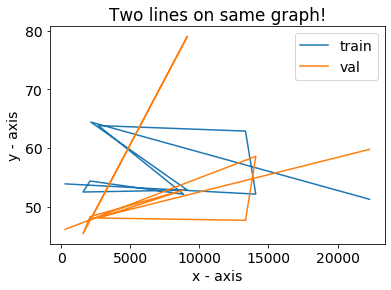

In [161]:
import matplotlib.pyplot as plt 
plt.plot(validate_data['people_ID'][200:210],ar[200:210],label = "train")

plt.plot(validate_data['people_ID'][200:210],validate_data['Infect_Prob'][200:210],label = "val")
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Two lines on same graph!') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

## TESTING THE MODEL ON TEST_DATASET

In [162]:
datatowrite = test_data['people_ID']

datatowrite.to_csv('res.csv',index = False,header=['people_ID'])

In [163]:
ar=lassoModelChosen.predict(x_test)
ar= np.around(ar, decimals=2)
np.savetxt("r1.csv", ar, delimiter=",")

In [164]:

csv_input1 = pd.read_csv('res.csv')
csv_input2 = pd.read_csv('r1.csv')
csv_input1['infect_prob']=csv_input2.iloc[:, 0]

csv_input1.to_csv('output.csv', index=False)